In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def inverse_PRVG(lam):
    """Generate a Poisson random variable using the inverse transform method."""
    U = random.uniform(0, 1)
    k = 0 
    p = math.exp(-lam)
    F = p
    while U > F:
        k += 1
        p = p * lam / k
        F += p
    return k

In [ ]:
def exp_PRVG(lam):
    """Generate a Poisson random variable using the exponential interarrival method"""
    t = 0
    k = 0
    while t < 1:
        U = random.uniform(0, 1)
        t += -math.log(U) / lam
        if t < 1:
            k += 1
    return k    

In [4]:
LAMBDA = 10
N = 10000


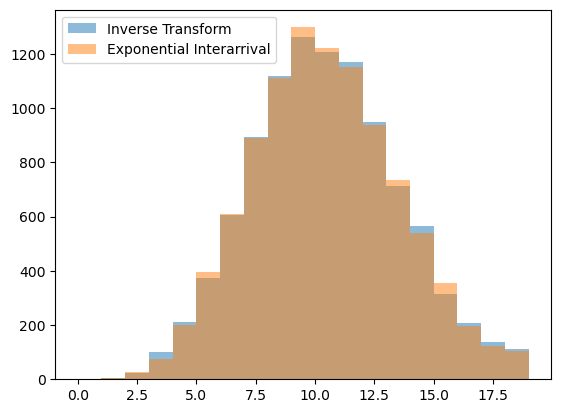

In [12]:
import matplotlib.pyplot as plt

data1 = [inverse_PRVG(LAMBDA) for _ in range(N)]
data2 = [exp_PRVG(LAMBDA) for _ in range(N)]

plt.hist(data1, bins=range(20), alpha=0.5, label='Inverse Transform')
plt.hist(data2, bins=range(20), alpha=0.5, label='Exponential Interarrival')
plt.legend()
plt.show()


In [6]:
def sampling_time(generator,p,N):
    """Calculate the time to generate N samples using the specified generator function."""
    t0 = time.perf_counter()
    X = [generator(p) for _ in range(N)]
    t1= time.perf_counter()
    return t1 - t0,X

In [7]:
t1, X1 = sampling_time(inverse_PRVG,LAMBDA,N)
t2, X2 = sampling_time(exp_PRVG,LAMBDA,N)

summary = f"""Sampling {N} Poisson Random Variables with p={LAMBDA}
Using inverse_PRVG: {t1:.6f} seconds
Using exp_PRVG: {t2:.6f} seconds"""
print(summary)

Sampling 10000 Poisson Random Variables with p=10
Using inverse_PRVG: 0.010302 seconds
Using exp_PRVG: 0.033448 seconds


C:\Users\Wayne\AppData\Local\Temp\ipykernel_31776\2781683050.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


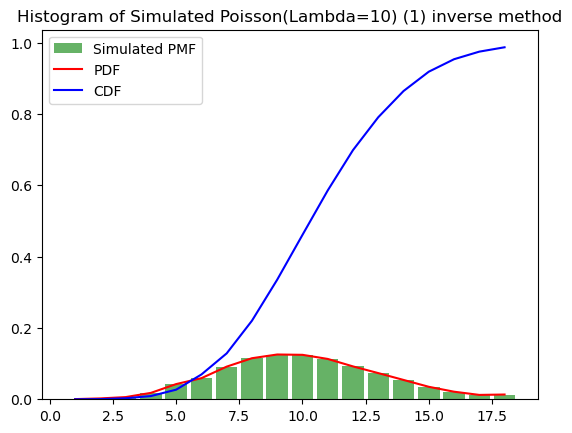

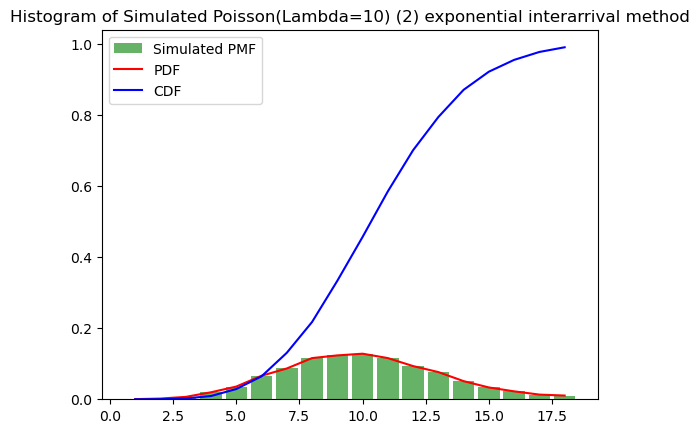

In [11]:
import scipy.stats as stats

def plot_hist(xs, p, title_suffix):
    # choose a reasonable right cut to display (e.g., 99th percentile)
    right = int(np.quantile(xs, 0.99))
    bins = np.arange(1, right + 2)  # left-aligned integer bins
    hist = np.histogram(xs, density=False, bins=bins)
    hist_dist = stats.rv_histogram(hist, density=False)
    fig, ax = plt.subplots()
    ax.set_title(f"Histogram of Simulated Poisson(Lambda={LAMBDA}) {title_suffix}")
    ax.hist(xs, bins=bins, align="left", density=True, rwidth=0.85, alpha=0.6, color='g', label='Simulated PMF')
    ax.plot(bins[:-1], hist_dist.pdf(bins[:-1]), 'r', label='PDF')
    ax.plot(bins[:-1], hist_dist.cdf(bins[:-1]), 'b-', label='CDF')
    ax.legend()
    fig.show()

plot_hist(X1, LAMBDA, "(1) inverse method")
plot_hist(X2, LAMBDA, "(2) exponential interarrival method")